## Naive Bayes for Spam Classification

In this notebook we will finally deploy our model and test if our model is accurate or not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Constants
TOKEN_SPAM_PROB_FILE = '/content/drive/My Drive/SpamData/03_Testing/prob-spam.txt'
TOKEN_NOT_SPAM_PROB_FILE = '/content/drive/My Drive/SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = '/content/drive/My Drive/SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = '/content/drive/My Drive/SpamData/03_Testing/test-features.txt'
TEST_TARGET_MATRIX = '/content/drive/My Drive/SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load our data

# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Targets
y_test = np.loadtxt(TEST_TARGET_MATRIX, delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_not_spam = np.loadtxt(TOKEN_NOT_SPAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')


# Testing our Loading
print(X_test)
print(y_test)
print(prob_token_spam)
print(prob_token_not_spam)
print(prob_token_all)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 2. 1. ... 0. 0. 0.]
 [3. 0. 1. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
[1. 1. 1. ... 0. 0. 0.]
[9.03796855e-03 4.88484286e-03 6.82767808e-03 ... 1.00926505e-04
 1.66528734e-04 3.02779516e-05]
[2.08569144e-02 9.88625660e-03 8.06177129e-03 ... 7.51957067e-05
 7.91533755e-06 9.89417194e-05]
[1.58331053e-02 7.76963830e-03 7.59917279e-03 ... 8.29897855e-05
 7.40179168e-05 6.50460481e-05]


## Joint Probability and Bayes Theorem

Let's review a little bit about the joint probability. This type of probability assumes that our events are independent, so that our probability A to B is calculated by:

P(A) x P(B)



For Example, If we get the following body message:

"Hello friend, would you like some pills?"

P(Spam | Hello) x P(Spam | Friend) x P(Spam | Like) x P(Spam | Pills)



Our Bayes theorem provides the following calculation 

P(Spam | Token) = (P(Token | Spam) / P(Token)) * P(Spam)

We must adapt our theorem for an array of samples, for this reason we will use the technique called **Dot Product**.

In [3]:
# Example: How to calculate the joint probability (Dot Product)

a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

print('a =', a)
print('b =', b)

# Use .dot() function! this is the same as 1 * 0 + 2 * 5 + 3 * 4 
print('a.dot(b)=', a.dot(b))


a = [1 2 3]
b = [0 5 4]
a.dot(b)= 22


In [4]:
# Example 2: with 2-D arrays

c = np.array([[0, 6], [3, 0], [5, 1]])
print('C shape is: ', c.shape)

print('a.dot(c):', a.dot(c)) # the same as  [1 * 0 + 2 * 3 + 3* 5 , 1 * 6 + 2 * 0 + 3 * 1]
print('Shape is:' ,a.dot(c).shape)

C shape is:  (3, 2)
a.dot(c): [21  9]
Shape is: (2,)


## Prior >> Guess or belief about some quantity

In our case % of spam messages in the test dataset. We have already calculated in the last notebook (around 31%):

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [5]:
PROB_SPAM = 0.3116

joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

joint_log_spam[:5]

array([  3.21643926,  13.38035269,  19.20668974, -16.61242345,
        27.93765399])

In order to calculate for not spam e-mails we need to adapt a little bit our formula. We can't use PROB_SPAM anymore given that this is the probability of being a spam. So we need to use calculate the proability of not being spam that is equals to 1 - PROB_SPAM:

$$P(Not Spam \, | \, X) = \frac{P(X \, | \, Not Spam \,) \, P(1 - Spam)} {P(X)}$$

In [6]:
joint_log_not_spam = X_test.dot(np.log(prob_token_not_spam) - np.log(prob_token_all)) +  np.log(1.0 -PROB_SPAM)
joint_log_not_spam[:5]

array([-11.05063426, -36.94310619, -38.25679825,  -2.70364873,
       -60.15266519])

## Let's make predictions!

We will compare the probabilities calculated! In other words which probability has the higher value (spam or not spam?)

$$P(Spam \, | \, x) \, > \, P(Not Spam \, | \, x)$$
<center>OR</center>
$$P(Spam \, | \, x) \, < \, P(Not Spam \, | \, x)$$


In [11]:
# Make predictions = Compare the values between arrays
predictions = joint_log_spam > joint_log_not_spam # True == Span / False == Not Spam

# Check our prediction array
predictions[-5:] * 1 # convert to integer (* 1)

array([0, 0, 0, 0, 0])

In [34]:
## Simplifying our equation
# We can remove the P(X) from both equations, because our problem does not depends on the probability of occuring a token.

joint_log_spam_Simple = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_not_spam_Simple = X_test.dot(np.log(prob_token_not_spam)) +  np.log(1.0 -PROB_SPAM)


### Evaluating our model

Now, let's take a look how good our model is, we will run 4 different metrics that will evaluate the precision of our model.

### Accuracy Metric

We will look the number of correct predictions divided by the total of predictions. This is the simplest metrics!

In [30]:
# Metrics Accuracy & Evaluation

correct_docs = (y_test == predictions).sum() # compare y_test with our predictions and then sum the final result
numdocs_wrong = X_test.shape[0] - correct_docs # take the nº rows and subtract what we know that is correct

print('Docs classified correctly:', correct_docs)
print('Docs classified incorrecly:', numdocs_wrong)


# Accuracy formula: Number of Correct Predictions / Total Cases for Predictions
accuracy = correct_docs / X_test.shape[0]
print('Model Accuracy:{:.2%}'.format(accuracy))

Docs classified correctly: 1671
Docs classified incorrecly: 52
Model Accuracy:96.98%


In [28]:
# Alternatively, you can calculate how much are wrong

fraction_wrong = numdocs_wrong / X_test.shape[0]
print('Fraction Classified Incorrectly: {:.2%}'.format(fraction_wrong))

Fraction Classified Incorrectly: 3.02%


## Visualizing our data and predictions

That is an excellent way to detect if our model is really correct 

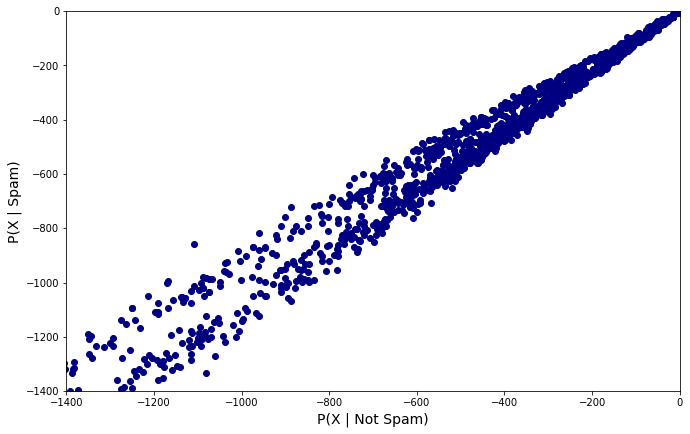

In [40]:
# Visualizing our results in a chart
# Joint Prob Spam x Joint Prob Not Spam

# Styling
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Not Spam)'

decision_boundary = np.linspace(start=-14000,stop=1, num=1000)

# Plotting
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1400, 1])
plt.ylim([-1400, 1])

plt.scatter(joint_log_not_spam_Simple, joint_log_spam_Simple, color='navy')
plt.show()

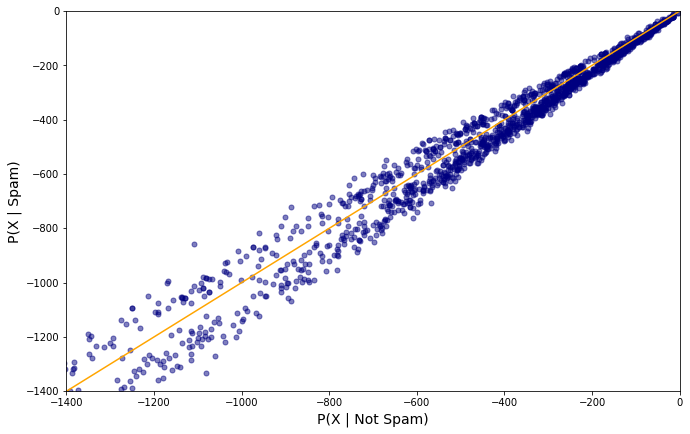

In [43]:
## Adding a decision boundary 

# Styling
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Not Spam)'

decision_boundary = np.linspace(start=-14000,stop=1, num=1000)

# Plotting
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1400, 1])
plt.ylim([-1400, 1])

plt.scatter(joint_log_not_spam_Simple, joint_log_spam_Simple, color='navy', alpha=0.5, s=25) # subplot, alpha and size helps us to treat the overplotting problem
plt.plot(decision_boundary, decision_boundary, color='orange') 
plt.show()

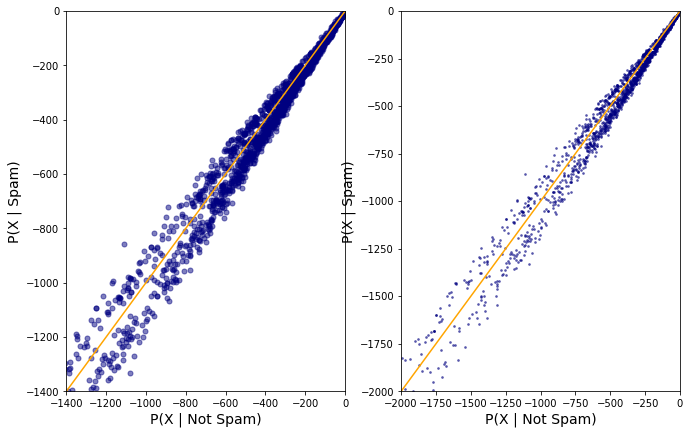

In [44]:
# Trearting the overplotting problem
# subplot, alpha and size helps us to treat the overplotting problem

# Styling
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Not Spam)'

decision_boundary = np.linspace(start=-14000,stop=1, num=1000)

# Plotting
plt.figure(figsize=(11, 7))

# Chart 1
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st chart

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1400, 1])
plt.ylim([-1400, 1])

plt.scatter(joint_log_not_spam_Simple, joint_log_spam_Simple, color='navy', alpha=0.5, s=25) 
plt.plot(decision_boundary, decision_boundary, color='orange') 

# Chart 2
plt.subplot(1, 2, 2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_not_spam_Simple, joint_log_spam_Simple, color='navy', alpha=0.5, s=3) 
plt.plot(decision_boundary, decision_boundary, color='orange') 

plt.show()

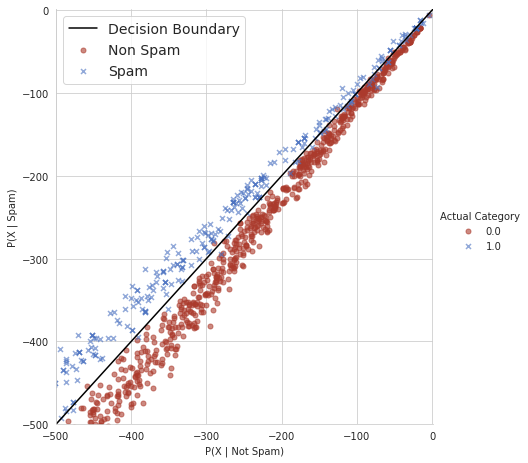

In [65]:
# Let's use Seaborn to make a better job

# Char Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

# Summarizing our DF for Seaborn 
summary_df = pd.DataFrame({yaxis_label: joint_log_spam_Simple, 
                          xaxis_label: joint_log_not_spam_Simple,
                          labels: y_test}) # labels will be the true values in our dataset 

my_colours = ['#AB3A2C','#4A71C0']

sns.lmplot(x= xaxis_label, 
           y= yaxis_label, 
           data= summary_df, 
           height= 6.5, 
           fit_reg=False, # fit_reg=False will remove our regression line
           scatter_kws= {'alpha': 0.6, 's': 25},
           hue= labels, # This hue will help us to paint our graph with the correct values 
           markers= ['o', 'x'],
           palette=my_colours
           )  

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(decision_boundary, decision_boundary, color='black')

plt.legend(('Decision Boundary', 'Non Spam', 'Spam'), loc='upper left', fontsize=14) ## add this after our decision boundary plotting!



## Dealing with false positves and false negatives

Taking only the accuracy as a metric can be erroneous. Because you are checking among all the population. For this reason we will set more testing metrics in order to evaluate properly our model.

In addition, our model can deal with True / False x Positive and Negatives. Let's take a quick review about the concepts.

Imagine that history from Wolf + Shepherd

* False-Positive: Shepherd says wolf! But there's no wolf and everyone is angry
* True-Positive: Shepherd says wolf! and there's a wolf!

* True-Negative: Shepherd says no wolf and there is no wolf really
* False-Negative: Shepherd says no wolf and there is a wolf!

In [69]:
# Checking for False positive/negatives and True positive/negatives

# Let's summarize our predictions
np.unique(predictions, return_counts=True)

# Results >> False (Not Spam)= 1163 / True (Spam) = 560 

(array([False,  True]), array([1163,  560]))

In [76]:
# True positives and True negatives
# We need to use set comparison to create this subset array == sentence
# To make comparison by each element you need to use > '&'

# True Positives => Our real values and predictions are equals y_test == 1 and predictions == 1
true_pos = (y_test == 1) & (predictions == 1)
print('True Positives -- Real World = Spam / Model = Spam:', true_pos.sum()) # Results >> 548 true positives (Spam and Not Spam)

# False Positives => Our real values and predictions are DIFFERENT y_test == 0 (not spam) and predictions == 1 (spam)
false_pos = (y_test == 0) & (predictions == 1)
print('False Positives -- Real World = Not Spam / Model = Spam:',false_pos.sum())

True Positives -- Model = Spam / Real World = Spam: 548
False Positives -- Model = Spam / Real World = Not Spam: 12


In [77]:
false_neg = (y_test == 1) & (predictions == 0)
print('False Negatives --  Real World =  Spam / Model = Not Spam', false_neg.sum())

true_neg = (y_test == 0) & (predictions == 0)
print('True Negatives -- Real World = Not Spam/ Model = Not Spam', true_neg.sum())

False Negatives -- Model = Spam / Real World = Not Spam: 40
True Negatives -- Model = Not Spam / Real World = Not Spam: 1123


**Tip: A confusion matrix is helpful this time!**


### Recall Score Metric

This metric assess the amount of True Positives divided by the sum of True Positives + **False Negatives** (model say no, but it is yes). In other words the recall is the ratio between spam emails correct identified and all spam emails presented in the dataset.

If our false negatives is zero, then we reached the maxium recall score that is 1 (or 100%)

In [86]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())

print('Recall Score: {:.2%}'.format(recall_score))

# But we can overvaluate and maximize our recall score by simply add all labels as spam, that will lead for no false_neg

Recall Score: 93.20%


### Precision Metric

This metric evaluate the true positive metric. The precision is calculated by true positives divided by true positive + **false positives** (model say yes, but is no). We have a ratio between the correct pam messages by the total number of times that we predicted an email as spam.

It is very similar to recall score, however we will use the false positives instead.

In [88]:
precision = true_pos.sum() / (true_pos.sum() + false_pos.sum())

print('Precision Metrics: {:.2%}'.format(precision))

Precision Metrics: 97.86%


Normally there is a trade-off between Recall vs Precision. When one is high the other one may be lower. They are inversely proportional.

### F-Score or F1 Metric

This metric is like a blend of Precision + Recall metrics. This metric is defined as 2 * (precision * recal / precision + recall ).

We create a balanced classifier and try the maximize the F-Score.

In [91]:
f_score = 2 * (precision * recall_score) / (precision + recall_score)
print('F-Score {:.2%}'.format(f_score))

F-Score 95.47%


## Extra: Naive Bayes with Scikit Learn

Yes...we develop Naive Bayes by ourselves from **scratch**! Scikit Learn has a package for this 

